In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree, metrics
from sklearn.tree import DecisionTreeClassifier #Arboles de decisión para Clasificaciòn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree


#@title Importar datos y liberías


df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSlVupEK53DrLXIPfxOGWCzNVvKyiirg5kl8LKH_OtQOf-FfIaf-3GX9V6wnSYgI9AiLNk20Xv-cao3/pub?gid=589364417&single=true&output=csv')

# Análisis exploratorio

In [59]:
df.shape

(48842, 14)

In [60]:
df.columns

Index(['age', 'workclass', 'education', 'education_number', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income-class'],
      dtype='object')

In [61]:
df.isnull().sum()

age                 0
workclass           0
education           0
education_number    0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country      0
income-class        0
dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               48842 non-null  int64 
 1   workclass         48842 non-null  object
 2   education         48842 non-null  object
 3   education_number  48842 non-null  int64 
 4   marital-status    48842 non-null  object
 5   occupation        48842 non-null  object
 6   relationship      48842 non-null  object
 7   race              48842 non-null  object
 8   sex               48842 non-null  object
 9   capital-gain      48842 non-null  int64 
 10  capital-loss      48842 non-null  int64 
 11  hours-per-week    48842 non-null  int64 
 12  native-country    48842 non-null  object
 13  income-class      48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [63]:
df.head()

,age,workclass,education,education_number,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-class
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [64]:
df['income-class'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [65]:
for column in df.columns:
    print(column)
    print(df[column].unique())
    print(df[column].isin(['?']).sum(), "\n")

age
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
0 

workclass
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
2799 

education
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
0 

education_number
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
0 

marital-status
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
0 

occupation
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv

In [66]:
df.select_dtypes(include=["number", "float", "int"]).describe()

,age,education_number,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [67]:
df.select_dtypes(exclude=["number", "float", "int"]).describe()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income-class
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,4
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,24720


---


# Transformación

In [68]:
df = df.replace('?', np.NAN)
df.isnull().sum()

age                    0
workclass           2799
education              0
education_number       0
marital-status         0
occupation          2809
relationship           0
race                   0
sex                    0
capital-gain           0
capital-loss           0
hours-per-week         0
native-country       857
income-class           0
dtype: int64

In [69]:
df['income-class'] = df['income-class'].str.replace('.','', regex=True)
df['income-class'].unique()

array(['<=50K', '>50K'], dtype=object)

# Modelo

In [70]:
X = df.drop('income-class', axis=1).values
XNombresAtributos = list(df.columns)
yNombresClases=df['income-class'].unique()
y = df['income-class'].values
print(X)
print('\n\n')
print(y)

[[39 'State-gov' 'Bachelors' ... 0 40 'United-States']
 [50 'Self-emp-not-inc' 'Bachelors' ... 0 13 'United-States']
 [38 'Private' 'HS-grad' ... 0 40 'United-States']
 ...
 [38 'Private' 'Bachelors' ... 0 50 'United-States']
 [44 'Private' 'Bachelors' ... 0 40 'United-States']
 [35 'Self-emp-inc' 'Bachelors' ... 0 60 'United-States']]



['<=50K' '<=50K' '<=50K' ... '<=50K' '<=50K' '>50K']


In [71]:
#@title Tabla de contingencia

for v in XNombresAtributos:
   tabla_contingencia= pd.crosstab(index=df['income-class'],columns=df[v])
   print(tabla_contingencia)

age            17   18    19    20    21    22    23    24    25    26  ...  \
income-class                                                            ...   
<=50K         595  862  1050  1112  1090  1161  1307  1162  1119  1068  ...   
>50K            0    0     3     1     6    17    22    44    76    85  ...   

age           81  82  83  84  85  86  87  88  89  90  
income-class                                          
<=50K         30  15   9  12   4   1   3   5   2  42  
>50K           7   0   2   1   1   0   0   1   0  13  

[2 rows x 74 columns]
workclass     Federal-gov  Local-gov  Never-worked  Private  Self-emp-inc  \
income-class                                                                
<=50K                 871       2209            10    26519           757   
>50K                  561        927             0     7387           938   

workclass     Self-emp-not-inc  State-gov  Without-pay  
income-class                                            
<=50K            

In [72]:
#@title Análisis de atributos | Prueba de Chi2

for v in XNombresAtributos[:-1]:
    # print(v)
    # print(stats.chi2_contingency(pd.crosstab(index=df['income-class'],columns=df[v])), '\n')
    print(v)
    # Realizar la prueba de chi-cuadrado
    chi2, pvalue, dof, expected = stats.chi2_contingency(pd.crosstab(index=df['income-class'],columns=df[v]))
    print('chi2 =', chi2)
    print('pvalue =', pvalue)
    if pvalue <= 0.05:
        print(f"pvalue <= 0.05 | La columna {v} es una buena variable predictora.\n")
    else:
       print(f"pvalue > .0.5 | La columna {v} no es una buena variable predictora.\n")


age
chi2 = 5177.581864439795
pvalue = 0.0
pvalue <= 0.05 | La columna age es una buena variable predictora.

workclass
chi2 = 1238.9900392221089
pvalue = 2.6121798441465798e-263
pvalue <= 0.05 | La columna workclass es una buena variable predictora.

education
chi2 = 6537.972961360964
pvalue = 0.0
pvalue <= 0.05 | La columna education es una buena variable predictora.

education_number
chi2 = 6537.972961360964
pvalue = 0.0
pvalue <= 0.05 | La columna education_number es una buena variable predictora.

marital-status
chi2 = 9816.015037266438
pvalue = 0.0
pvalue <= 0.05 | La columna marital-status es una buena variable predictora.

occupation
chi2 = 5502.144900139091
pvalue = 0.0
pvalue <= 0.05 | La columna occupation es una buena variable predictora.

relationship
chi2 = 10088.72249015222
pvalue = 0.0
pvalue <= 0.05 | La columna relationship es una buena variable predictora.

race
chi2 = 487.0262868376271
pvalue = 4.2843777102233777e-104
pvalue <= 0.05 | La columna race es una buena var

Todas las columnas son buenas elecciones para tomar en el modelo.
Considerando que el dataset tiene tanto variables continuas como categóricas y que todas han pasado la prueba de chi2 el mejor modelo de clasificación es el **RandomForest**.

In [73]:
#@title LabelEncoder | Transformar las columnas categóricas

le = LabelEncoder()

# Iterar sobre todas las columnas en X y transformar las categóricas en valores numéricos
for i in range(X.shape[1]):
    if isinstance(X[0, i], str):  # Verificar si la columna es de tipo str (categórica)
        X[:, i] = le.fit_transform(X[:, i])


In [74]:
#@title Particionamiento

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) # test 30%

In [75]:
#@title Configuración y entrenamiento del modelo

# from sklearn.ensemble import RandomForestClassifier # ya importado

modelo_rf = RandomForestClassifier()    # n_estimators : int, default=100 The number of trees in the forest.
                                        # criterion : {"gini", "entropy", "log_loss"}, default="gini" The function to measure the quality of a split.
                                        # max_depth : int, default=None The maximum depth of the tree.
modelo_rf.fit(X_train, y_train)

RandomForestClassifier()

In [76]:
print(f"Cantidad de árboles: {modelo_rf.n_estimators}, default=100")

Cantidad de árboles: 100, default=100


In [77]:
#@title Predicción

y_pred = modelo_rf.predict(X_test)

Reporte de Clasificación:
              precision    recall  f1-score   support

       <=50K       0.89      0.92      0.90     11200
        >50K       0.71      0.62      0.67      3453

    accuracy                           0.85     14653
   macro avg       0.80      0.77      0.79     14653
weighted avg       0.85      0.85      0.85     14653



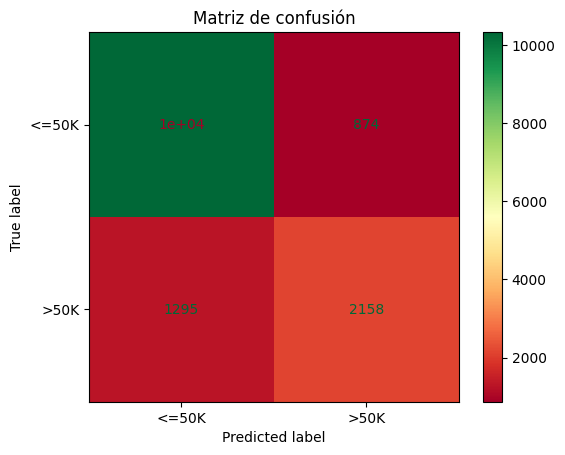

In [78]:
report = classification_report(y_test, y_pred)
print(f'Reporte de Clasificación:\n{report}')

mc_rf = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=df['income-class'].unique(),
    index=df['income-class'].unique(),
    )

mc_grafic = metrics.ConfusionMatrixDisplay(mc_rf.values,
                                           display_labels = df['income-class'].unique())
mc_grafic.plot(cmap='RdYlGn')
plt.title("Matriz de confusión")
plt.show()


```
Métrica         Fórmula
Precisión       Verdaderos Positivos / (Verdaderos Positivos + Falsos Positivos)
Sensibilidad    Verdaderos Positivos / (Verdaderos Positivos + Falsos Negativos)
F1-score        2 * (Precisión * Sensibilidad) / (Precisión + Sensibilidad)
```


In [79]:
print('Aplicación de fórmulas para <=50K')
accuracy = mc_rf.iloc[0, 0] / (mc_rf.iloc[0, 0] + mc_rf.iloc[1, 0])
recall = mc_rf.iloc[0, 0] / (mc_rf.iloc[0, 0] + mc_rf.iloc[0, 1])
f1_score = 2 * (accuracy * recall) / (accuracy + recall)

print('accuracy = ', round(accuracy, 2))
print('recall   = ', round(recall, 2))
print('f1_score = ', round(f1_score, 2))

Aplicación de fórmulas para <=50K
accuracy =  0.89
recall   =  0.92
f1_score =  0.9


In [80]:
print('Aplicación de fórmulas para >50K')
accuracy = mc_rf.iloc[1, 1] / (mc_rf.iloc[1, 1] + mc_rf.iloc[0, 1])
recall = mc_rf.iloc[1, 1] / (mc_rf.iloc[1, 1] + mc_rf.iloc[1, 0])
f1_score = 2 * (accuracy * recall) / (accuracy + recall)

print('accuracy = ', round(accuracy, 2))
print('recall   = ', round(recall, 2))
print('f1_score = ', round(f1_score, 2))

Aplicación de fórmulas para >50K
accuracy =  0.71
recall   =  0.62
f1_score =  0.67


# Conclusiones

Basado en el reporte de clasificación y la matriz de confusión, se puede concluir que el modelo de clasificación tiene un rendimiento general bueno. La precisión, la sensibilidad y el F1-score son todos superiores al 0.80, lo que significa que el modelo es capaz de predecir correctamente la clase de ingresos de la mayoría de los casos.

En particular, el modelo tiene un buen rendimiento para predecir la clase de ingresos de los individuos con un ingreso inferior o igual a 50,000. La precisión para esta clase es del 0.89, lo que significa que el modelo predice correctamente el 89% de los casos. La sensibilidad para esta clase es del 0.92, lo que significa que el modelo identifica correctamente el 92% de los individuos con un ingreso inferior a 50,000.

El modelo también tiene un buen rendimiento para predecir la clase de ingresos de los individuos con un ingreso superior a 50.000. La precisión para esta clase es del 0.71, lo que significa que el modelo predice correctamente el 72% de los casos. La sensibilidad para esta clase es del 0.62, lo que significa que el modelo identifica correctamente el 62% de los individuos con un ingreso superior a 50.000.



A modo de ejemplo se visualizará el primer árbol del RandomForest.

In [ ]:
# from sklearn.tree import plot_tree # ya importado

# Acceder a un árbol individual en el bosque aleatorio (por ejemplo, el primer árbol)
arbol_individual = modelo_rf.estimators_[0]  # Cambia el índice para acceder a otro árbol

# Visualizar el árbol individual
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 8), dpi=300)
plot_tree(arbol_individual,
          feature_names=XNombresAtributos,
          class_names=yNombresClases,
          filled=True)
plt.show()